In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

#### Read the outliers file and add a feature "prev_sold_year"

In [2]:
realtor_data_df = pd.read_csv('outliers.csv')
realtor_data_df["prev_sold_year"] = pd.to_datetime(realtor_data_df["prev_sold_date"], format='%Y-%m-%d').dt.year

In [3]:
for_sale_df = realtor_data_df

#### Create a feature that will append '0' to the zipcode feature

In [4]:
for_sale_df["zip_code_str"] = '0'+ for_sale_df["zip_code"].apply(int).apply(str)
for_sale_df.head()

,Unnamed: 0,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,prev_sold_year,zip_code_str
0,1,4.0,3.0,2.34,6238.0,3320.0,2021-06-01,579900.0,2021,06238
1,2,1.0,1.0,0.17,6279.0,680.0,2019-08-16,65000.0,2019,06279
2,4,2.0,1.0,0.36,6066.0,860.0,2016-09-02,144900.0,2016,06066
3,8,2.0,2.0,0.17,6074.0,1168.0,2020-12-28,172500.0,2020,06074
4,31,3.0,2.0,5.88,6071.0,1152.0,2017-01-03,89900.0,2017,06071


#### Get the unique zipcodes in the dataframe

In [5]:
zipcodes = for_sale_df["zip_code"]
len(zipcodes.unique())

245

#### Read the file with Latitude and Longitude, rename the features

In [6]:
# Because of its size this dataset is not saved in the code repo for this project.
# It can be downloaded and saved in the same path to make this Notebook run.
zip_lon_lat = pd.read_csv('../../../zip_lat_long.csv')
zip_lon_lat.rename(columns={"ZIP":"zip_code", "LAT":"latitude", "LNG":"longitude"},inplace=True)
zip_lon_lat.head()

,zip_code,latitude,longitude
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


#### Find matching zipcodes that were found in the dataset

In [7]:
find_zipcodes_df = zip_lon_lat[zip_lon_lat["zip_code"].isin(zipcodes.unique())]
find_zipcodes_df["zip_code_str"] = "0"+find_zipcodes_df["zip_code"].apply(str)
find_zipcodes_df.head()

,zip_code,latitude,longitude,zip_code_str
1691,6001,41.787159,-72.852046,06001
1692,6002,41.844930,-72.740951,06002
1693,6010,41.681578,-72.940749,06010
1694,6013,41.749079,-72.948657,06013
1695,6016,41.901899,-72.547432,06016


#### Merge the dataset with the Latitude and Longitude data

In [8]:
merge_df = for_sale_df.merge(find_zipcodes_df, how='outer', on='zip_code_str')

merge_df.rename(columns={"zip_code_x":"zip_code"},inplace=True)
merge_df.drop(columns=["zip_code_y"],inplace=True)

#### Display the records that didn't match up

In [9]:
merge_df[merge_df["latitude"].isna()]

,Unnamed: 0,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,prev_sold_year,zip_code_str,latitude,longitude


In [10]:
# "08218","39.1386785","-74.856442"

In [11]:
# "08239","39.1979584","-74.6577965"

In [12]:
# "08245","39.1778125","-74.8300693"

#### Drop the records that didn't match up

In [13]:
merge_df.dropna(subset=['latitude'], inplace=True)

In [14]:
merge_df.head()

,Unnamed: 0,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,prev_sold_year,zip_code_str,latitude,longitude
0,1,4.0,3.0,2.34,6238.0,3320.0,2021-06-01,579900.0,2021,06238,41.780138,-72.343943
1,713,2.0,1.0,0.11,6238.0,963.0,2018-07-05,89000.0,2018,06238,41.780138,-72.343943
2,762,3.0,2.0,5.49,6238.0,1288.0,2021-06-04,164900.0,2021,06238,41.780138,-72.343943
3,957,3.0,1.0,0.34,6238.0,1104.0,2017-03-27,199999.0,2017,06238,41.780138,-72.343943
4,1027,4.0,3.0,1.72,6238.0,2313.0,2020-09-15,519900.0,2020,06238,41.780138,-72.343943


#### Use KMeans to cluster latitude and longitude into counties

In [15]:
numberofcounties = 8
kmeans = KMeans( init="random", n_clusters=21,random_state=0)
latlong = merge_df[["latitude","longitude"]]
kmeans.fit(latlong)
y_kmeans = kmeans.predict(latlong)

#### Plot the counties

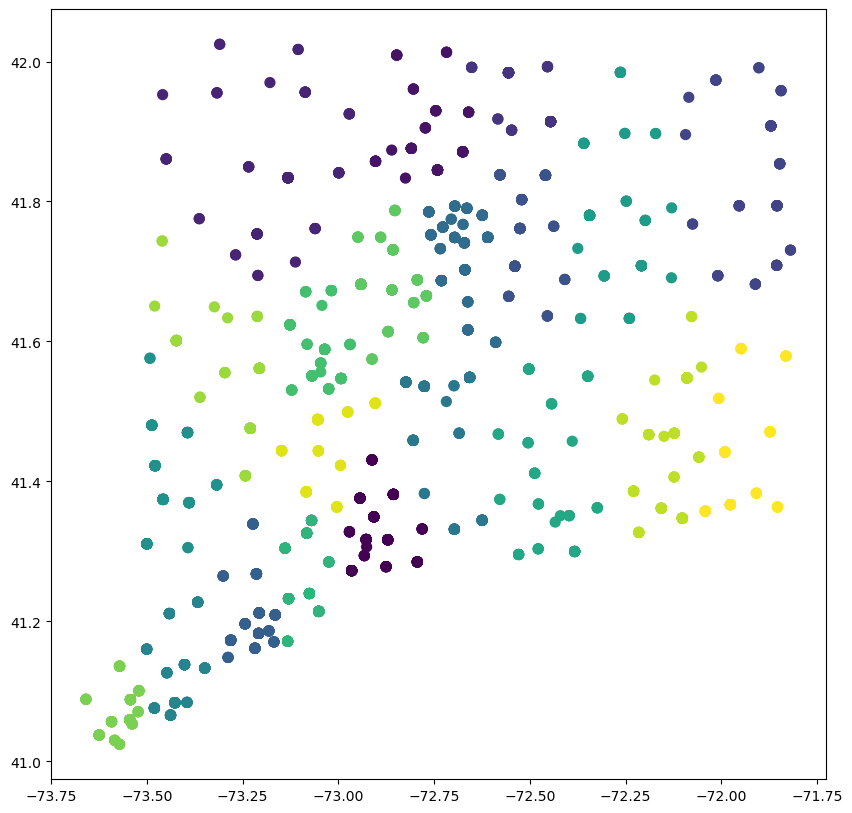

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(merge_df["longitude"], merge_df["latitude"], c=y_kmeans, s=50, cmap='viridis')

#### Add county to the dataset going forward

In [17]:
merge_df["county"] = y_kmeans

In [18]:
merge_df.head()

,Unnamed: 0,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,prev_sold_year,zip_code_str,latitude,longitude,county
0,1,4.0,3.0,2.34,6238.0,3320.0,2021-06-01,579900.0,2021,06238,41.780138,-72.343943,11
1,713,2.0,1.0,0.11,6238.0,963.0,2018-07-05,89000.0,2018,06238,41.780138,-72.343943,11
2,762,3.0,2.0,5.49,6238.0,1288.0,2021-06-04,164900.0,2021,06238,41.780138,-72.343943,11
3,957,3.0,1.0,0.34,6238.0,1104.0,2017-03-27,199999.0,2017,06238,41.780138,-72.343943,11
4,1027,4.0,3.0,1.72,6238.0,2313.0,2020-09-15,519900.0,2020,06238,41.780138,-72.343943,11


#### Save the records to a csv file

In [19]:
merge_df.to_csv("geocoded.csv")